In [1]:
import cv2
import numpy as np
import keras
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from random import shuffle
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


Using TensorFlow backend.
C:\Users\sppol\Miniconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sppol\Miniconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sppol\Miniconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sppol\Miniconda3\envs\py36\lib\site-pa

In [2]:
imageSize = 64
test_data_dir = "C:/Users/sppol/Documents/Ai_deeplearning/BaseLine_Dataset/test"


In [3]:

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(imageSize, imageSize),#64
    batch_size=24,
    color_mode="grayscale",
    shuffle=False,
#     class_mode='categorical',
    classes=['Normal','Diseases']
   
    ) # set as test data


Found 459 images belonging to 2 classes.


In [4]:
# datagen = ImageDataGenerator()
# gen = datagen.flow_from_directory(test_data_dir)
# g = "Diseases\\"
# for file in gen.filenames:
#     if g in file:
#         file   = file.replace(g,"")
#         print(file)
    

In [5]:
# print(test_generator.classes)

In [6]:
from keras.models import load_model
teeth = load_model('BaseLineTeeth.h5')

In [7]:
test = teeth.predict_generator(test_generator, steps =20, verbose=0)
test = np.argmax(test, axis=1)

# print(test);
# print((test_generator.classes));
# print(len(test))
# print(len(test_generator.classes))

In [8]:
# test[:]

In [9]:
from sklearn.metrics import classification_report
target_names = ['Normal', 'Diseases']
print(classification_report(test_generator.classes, test, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.97      0.94      0.96       233
    Diseases       0.94      0.97      0.96       226

    accuracy                           0.96       459
   macro avg       0.96      0.96      0.96       459
weighted avg       0.96      0.96      0.96       459



In [10]:
import pandas as pd
from sklearn.metrics import confusion_matrix , roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
test_generator.reset

df = pd.DataFrame({
    'filename':test_generator.filenames,
    'predict':test[:],
    'classes':test_generator.classes
    
})

C:\Users\sppol\Miniconda3\envs\py36\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
df

filename  predict  classes
0      Normal\Thidar  หญิง  23_1.bmp        0        0
1      Normal\Thidar  หญิง  23_2.bmp        0        0
2      Normal\Thidar  หญิง  23_3.bmp        0        0
3      Normal\Thidar  หญิง  23_4.bmp        0        0
4      Normal\Thidar  หญิง  23_5.bmp        0        0
..                               ...      ...      ...
454  Diseases\เทวาฤทธิ์ ชาย 53_5.jpg        1        1
455        Diseases\แดง ชาย 56_1.jpg        1        1
456        Diseases\แดง ชาย 56_3.jpg        1        1
457        Diseases\แดง ชาย 56_4.jpg        1        1
458        Diseases\แดง ชาย 56_6.jpg        1        1

[459 rows x 3 columns]

In [12]:
# df['classes'].value_counts().plot(kind='bar')
# plt.title('Labels counts')
# plt.xlabel('Nomal-Diseases')
# plt.ylabel('Count')
# plt.show()

In [13]:
pd.set_option('display.float_format', lambda x: '%.5' % x)
df['predict'] = df['predict']>0.5
df.predict = df.predict.astype(int)


In [14]:
misclassified = df[df['predict']!=df['classes']]
print('Total misclassified image from 459 test images : %d'%misclassified['classes'].count())
# isclassified['classes'].count()).plot(kind='bar')


Total misclassified image from 459 test images : 20


In [15]:
# misclassified.misclassified['classes'].count().plot(kind='bar')
# plt.title('Labels counts')
# plt.xlabel('Label')
# plt.ylabel('Count')
# plt.show()

In [16]:
# class ImageViewer:
#     def read_img(self,id, folder='train'):
#         """
#         Read image by it's id
#         """
#         file='../input/' + folder + '/' + str(id) + '.tif'
#         im=cv2.imread(file)
#         return im

#     def draw_sample_images(self):
#         """
#         Draw cancer and healthy images for EDA
#         """
#         ncols=4
#         f, ax = plt.subplots(nrows=2,ncols=ncols, 
#                              figsize=(4*ncols,5*2))
#         i=-1
#         captions=['Pathology', 'Good']
#         # Draw one row for cancer, one row for healthy images
#         for label in [0,1]:
#             i=i+1
#             samples = all_df[all_df['label']==label]['id'].sample(ncols).values
#             for j in range(0,ncols):
#                 file_id=samples[j]
#                 im=self.read_img(file_id)
#                 ax[i, j].imshow(im)
#                 ax[i, j].set_title(captions[i], fontsize=16)  
#         plt.tight_layout()
#         plt.show()
    
# ImageViewer().draw_sample_images()

In [17]:
result= misclassified['filename'].astype(str).loc[:]
# # .to_numpy()
results = result.to_numpy()

In [19]:
datagen = ImageDataGenerator()
gen = datagen.flow_from_directory(test_data_dir)
diseases = "Diseases\\"
normal = "Normal\\"
miss_image = []
for file in results:
    if diseases in file:
        file   = file.replace(diseases,"")
    else:
        file   = file.replace(nomal,"")
    
    miss_image.append(file)

Found 459 images belonging to 2 classes.


In [38]:
# from skimage import io
# import cv2
# def predict_image(image):
#     image = cv2.imread(image)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     img = image.resize((64, 64))
#     img = io.imread(img, as_gray=True)
#     numpy_image = image.img_to_array(img)
    
#     image_batch = np.expand_dims(numpy_image,axis=0)
#     image_batch = image_batch / 255
#     acc = teeth.predict(image_batch)
#     print(acc)
#     return acc

กุลธิดา  หญิง 43_1.bmp
กุลธิดา  หญิง 43_4.bmp
ชนินทร์  ชาย 52_4.bmp
ชุติภา หญิง 55_1.bmp
ชุติภา หญิง 55_3.bmp
ณัฏฐิญา  หญิง 57_5.bmp
ยุมินทร์  หญิง 9_2.bmp
ยุมินทร์  หญิง 9_5.bmp
รันวษา หญิง 8_6.bmp
เกษม  ชาย 61_3.bmp
เสริมเกียรติ์  ชาย 37_1.bmp
เสาวคนธ์ หญิง 64_1.jpg
ไชยนครินทร์ ชาย 50_5.bmp


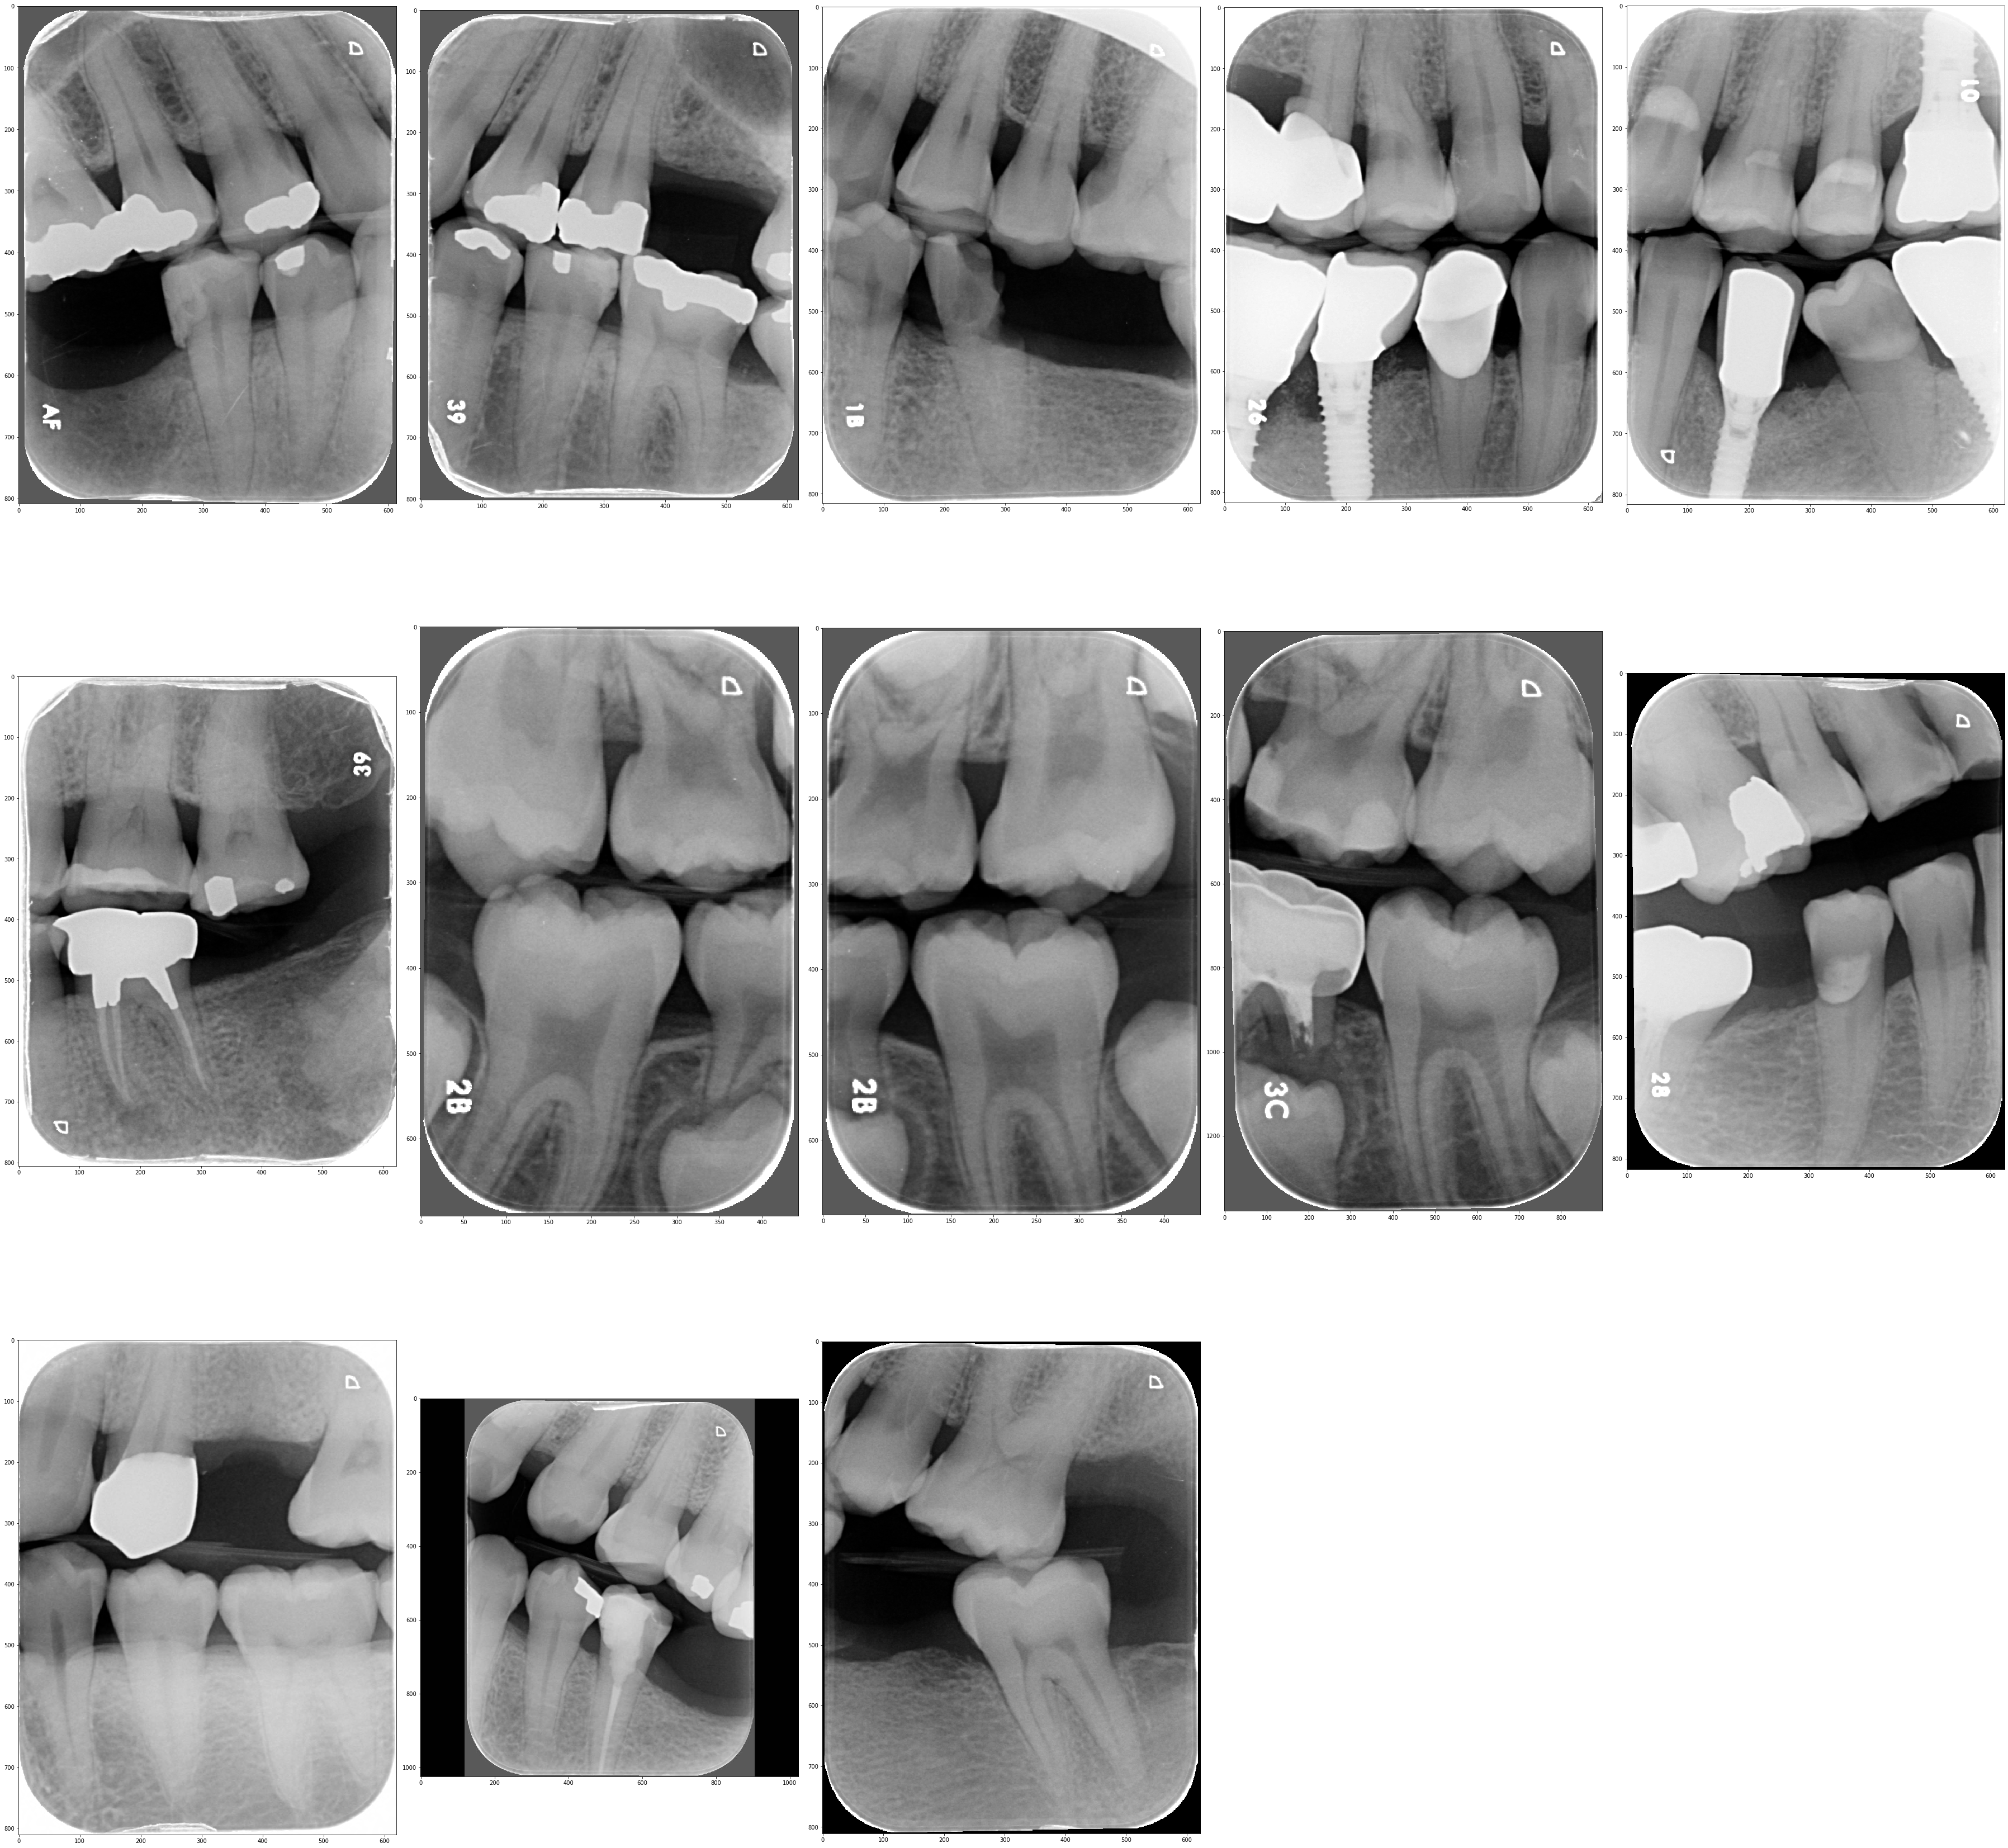

In [44]:
cpt = 0 
plt.figure(0, figsize=(50,50))
for file in os.listdir(test_data_dir+"/Normal"):
    if(file in miss_image):
#         plt.subplot(7)
        img = load_img(test_data_dir+"/Normal/"+ file)
#         predict_image(img)
        print(file)
        cpt = cpt + 1
        plt.subplot(3,5,cpt)
        plt.imshow(img)
        
plt.tight_layout()

plt.show()

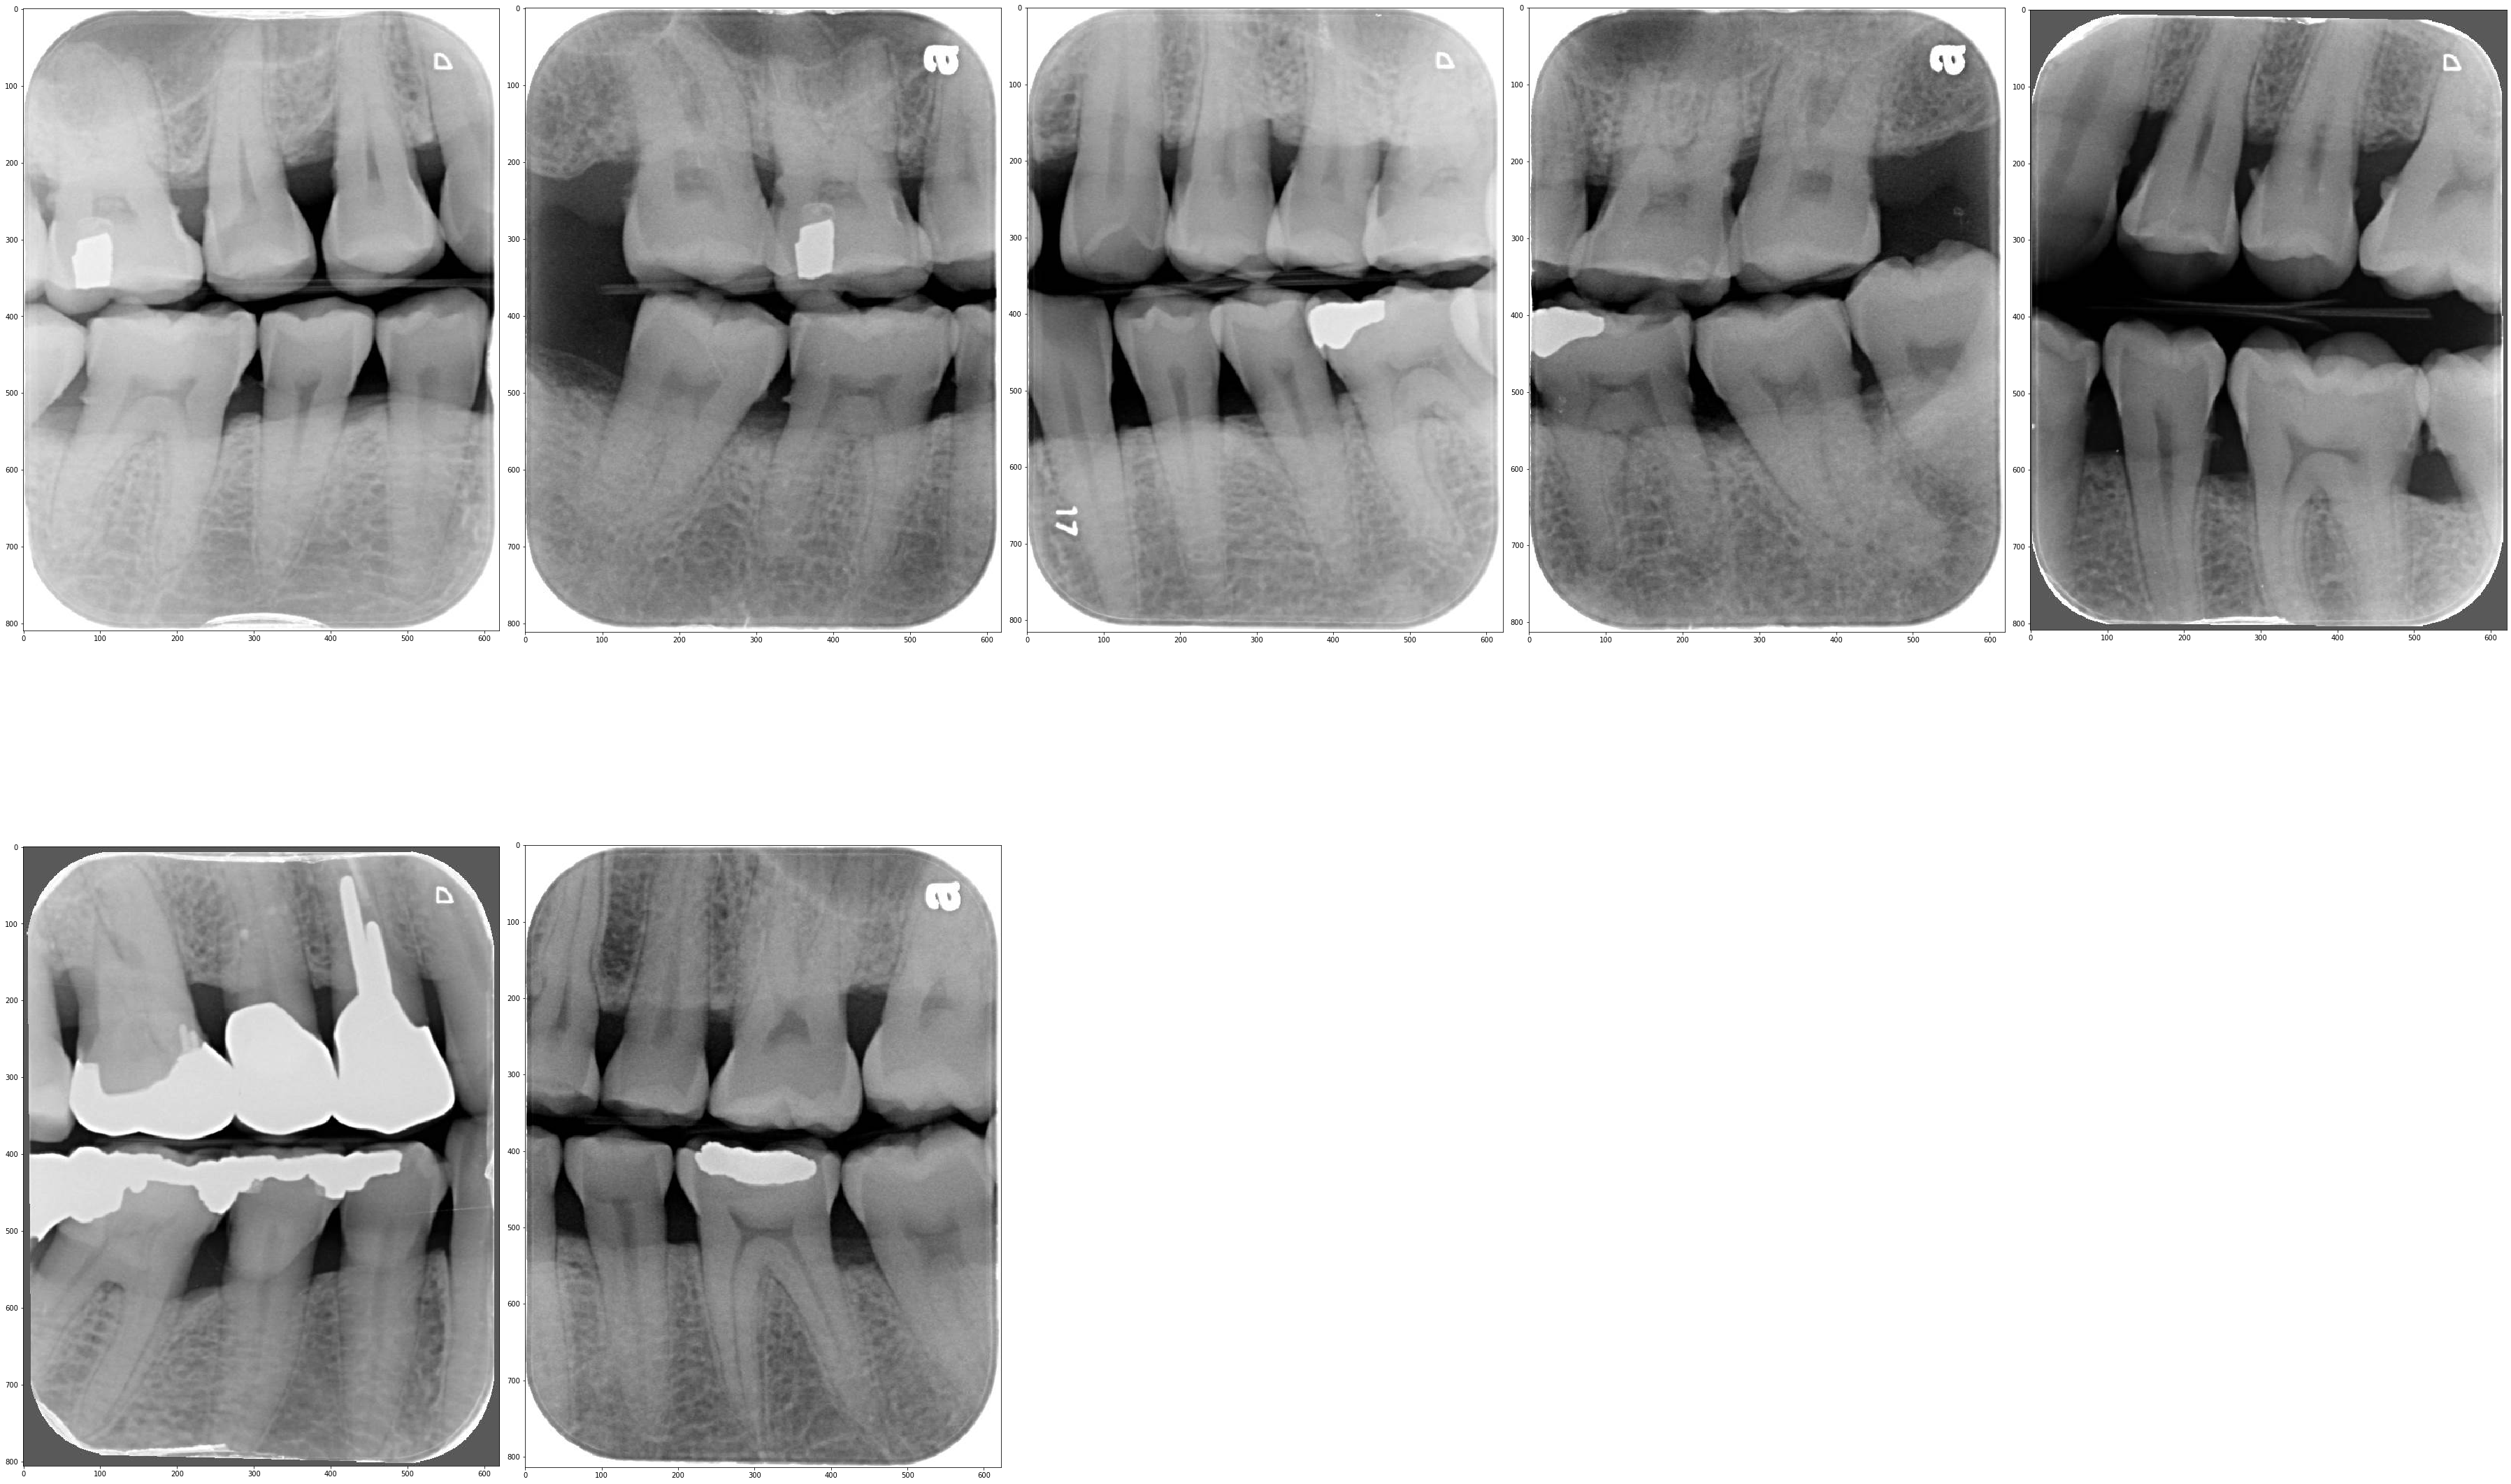

In [43]:

plt.figure(0, figsize=(50,50))
cpt = 0 

for file in os.listdir(test_data_dir+"/Diseases"):
    if(file in miss_image):
#         plt.subplot(7)
        img = load_img(test_data_dir+"/Diseases/"+ file)
        cpt = cpt + 1
        plt.subplot(3,5,cpt)
        plt.imshow(img)
plt.tight_layout()

In [129]:
# image =[]
# for x in result:
#      image.append(x)
# print(image)

filename  predict  classes
0      Normal\Thidar  หญิง  23_1.bmp        0        0
1      Normal\Thidar  หญิง  23_2.bmp        0        0
2      Normal\Thidar  หญิง  23_3.bmp        0        0
3      Normal\Thidar  หญิง  23_4.bmp        0        0
4      Normal\Thidar  หญิง  23_5.bmp        0        0
..                               ...      ...      ...
454  Diseases\เทวาฤทธิ์ ชาย 53_5.jpg        1        1
455        Diseases\แดง ชาย 56_1.jpg        1        1
456        Diseases\แดง ชาย 56_3.jpg        1        1
457        Diseases\แดง ชาย 56_4.jpg        1        1
458        Diseases\แดง ชาย 56_6.jpg        1        1

[459 rows x 3 columns]

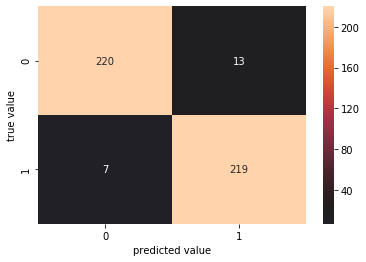

In [44]:
#Prediction of test set


conf_matrix = confusion_matrix(df.classes,df.predict)
sns.heatmap(conf_matrix,fmt='g',annot=True,center=20);
plt.xlabel('predicted value')
plt.ylabel('true value');





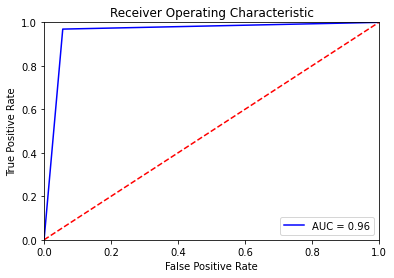

In [18]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# probs = teeth.predict(test_generator)
# preds = test[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_generator.classes, test)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')